In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'credit-score-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2289007%2F3846912%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240227%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240227T195251Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2e513d096471bfc307925eca4b4c1de4c09f5cdcae3eaa03345af62553e890a24b1c405816586ba593ef1e1137a992c2ac64f4bddd971bd0a28e06a7a680e5c3f5d18fcef9ea97281d3e4dd0f12bb53e701aaac3addd158314df31e7017b1747f2959de74b452b461411c2bb427a25fd0050cf17b2567d2098c058ed0401c4ecdc4158e62e3a7f8a09a030fe9dd5d321de367229b810aec30195567dc29c46f751bbb850d477a2360e80af6adf6fd53f0c8afe8d6de919828e0a78934aca7296625fe7d42174c4c9787ca0758b5e21274c5b7c4e59574f74c699ba4bb9054a957ed09a7f0001edf6a32e9dfcbce99998616956deac0f001bdd48a59ad7b0f570'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 9973595 bytes downloaded
Downloaded and uncompressed: credit-score-classification
Data source import complete.


# reading data

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Inhand_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_month: Represents the monthly EMI payments

Amount_invested_monthly: Represents the monthly amount invested by the customer

Payment_Behaviour: Represents the payment behavior of the customer

Monthly_Balance:Represents the monthly balance amount of the customer

Credit_Score:Represents the bracket of credit score (Poor, Standard, Good) ((Target))



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('/kaggle/input/credit-score-classification/train.csv')
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
df.shape

(100000, 28)

In [6]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [7]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


# handling invalid values


In [8]:
duplicated=df.duplicated()
duplicated.sum()

0

In [9]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Credit_History_Age'] = pd.to_numeric(df['Credit_History_Age'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')





In [10]:
month= {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8}
df['Month'] = df['Month'].replace(month)

In [11]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [12]:
C= {'Standard':1,
    'Poor':2,
    'Good':3
   }
df['Credit_Score'] = df['Credit_Score'].replace(C)

In [13]:
df=df.drop(columns=['ID','Name','SSN','Customer_ID'],axis=1)

In [14]:
df['Annual_Income']=df['Annual_Income'].replace('_','',regex=True)

In [15]:
df['Age']=df['Age'].replace(-500.0,np.nan)

In [16]:
df['Payment_Behaviour']=df['Payment_Behaviour'].replace('!@9#%8',np.nan)

In [17]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("Low_spent_Small_value_payments",1)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("Low_spent_Medium_value_payments",2)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("Low_spent_Large_value_payments",3)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("High_spent_Small_value_payments",4)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("High_spent_Medium_value_payments",5)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("High_spent_Large_value_payments",6)

In [18]:
df['Credit_Mix']=df['Credit_Mix'].replace('_',np.nan)

In [19]:
df["Credit_Mix"]=df["Credit_Mix"].replace("Good",1)
df["Credit_Mix"]=df["Credit_Mix"].replace("Bad",2)
df["Credit_Mix"]=df["Credit_Mix"].replace("Standard",3)

In [20]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [21]:
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("Yes",1)
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("No",2)
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("NM",3)

In [22]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace('_',np.nan)

In [23]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [24]:
df['Occupation']=df['Occupation'].replace('_______',np.nan)

In [25]:
df['Delay_from_due_date']=df['Delay_from_due_date'].abs()

# data preprocessing

In [26]:
df.isnull().sum()/df.shape[0]*100

Month                         0.000
Age                           5.825
Occupation                    7.062
Annual_Income                 6.980
Monthly_Inhand_Salary        15.002
Num_Bank_Accounts             0.000
Num_Credit_Card               0.000
Interest_Rate                 0.000
Num_of_Loan                   4.785
Type_of_Loan                 11.408
Delay_from_due_date           0.000
Num_of_Delayed_Payment        9.746
Changed_Credit_Limit          2.091
Num_Credit_Inquiries          1.965
Credit_Mix                   20.195
Outstanding_Debt              1.009
Credit_Utilization_Ratio      0.000
Credit_History_Age          100.000
Payment_of_Min_Amount         0.000
Total_EMI_per_month           0.000
Amount_invested_monthly       8.784
Payment_Behaviour             7.600
Monthly_Balance               1.209
Credit_Score                  0.000
dtype: float64

<Axes: >

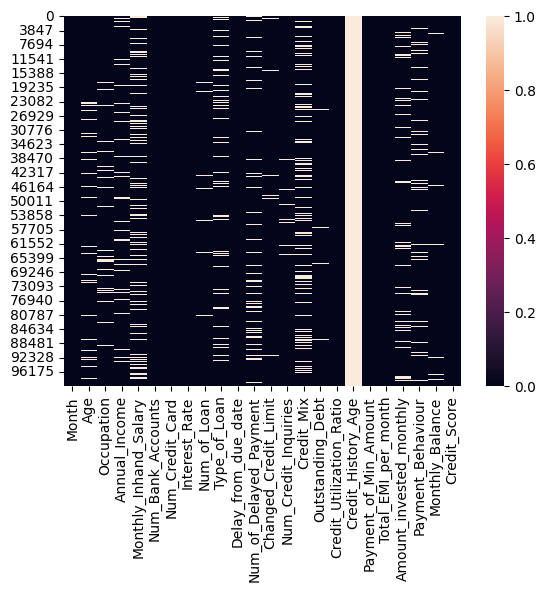

In [27]:
sns.heatmap(df.isnull())

In [28]:
df=df.drop(columns=['Credit_History_Age'],axis=1)

In [29]:
df.loc[(df["Age"] > 90) | (df["Age"] < 10), "Age"] = np.nan

In [30]:
df['Age'].value_counts()

38.0    2833
28.0    2829
31.0    2806
26.0    2792
32.0    2749
25.0    2737
36.0    2720
35.0    2716
34.0    2707
27.0    2707
39.0    2705
44.0    2688
19.0    2650
22.0    2641
41.0    2638
43.0    2605
37.0    2605
20.0    2603
30.0    2602
21.0    2594
29.0    2575
24.0    2553
23.0    2537
45.0    2501
40.0    2477
42.0    2441
33.0    2429
18.0    2270
46.0    1538
15.0    1488
17.0    1438
16.0    1378
48.0    1330
49.0    1307
55.0    1299
53.0    1287
52.0    1283
54.0    1236
51.0    1224
50.0    1205
47.0    1165
14.0    1129
56.0     348
Name: Age, dtype: int64

In [31]:
Age_fill=[38.0,28.0,31.0,26.0,32.0,25.0,36.0,35.0,34.0,27.0,39.0,44.0 ,
19.0    ,22.0  ,
41.0    ,43.0  ,
37.0    ,20.0  ,
30.0    ,21.0  ,
29.0    ,24.0 ,
23.0    ,45.0  ,
40.0    ,42.0  ,
33.0    ,18.0  ,
46.0    ,15.0  ,
17.0    ,16.0  ,
48.0    ,49.0 ,
55.0    ,53.0 ,
52.0    ,54.0 ,
51.0    ,50.0 ,
47.0    ,14.0    ,
56.0 ]


In [32]:
df['Age']=df['Age'].fillna(pd.Series(np.random.choice(Age_fill,len(df.index))))

In [33]:
fill_list=['Lawyer',
'Architect' ,
'Engineer' , 'Scientist',
'Mechanic' ,
'Accountant' ,
'Developer'  ,
'Media_Manager' ,
'Teacher'      ,
'Entrepreneur' ,
'Doctor'      ,
'Journalist'  ,
'Manager'     ,
'Musician'   ,
'Writer' ,  ]
df['Occupation']=df['Occupation'].fillna(pd.Series(np.random.choice(fill_list,len(df.index))))

In [34]:
df['Annual_Income'].value_counts()

17273.83       16
20867.67       16
36585.12       16
95596.35       15
9141.63        15
               ..
14855994.00     1
21725043.00     1
16237903.00     1
4894060.00      1
12029909.00     1
Name: Annual_Income, Length: 13437, dtype: int64

In [35]:
fill=[17273.83 ,
20867.67  ,
36585.12  ,
95596.35       ,
9141.63        ,

14855994.00     ,
21725043.00     ,
16237903.00     ,
4894060.00      ,
12029909.00     ,]

df['Annual_Income']=df['Annual_Income'].fillna(pd.Series(np.random.choice(fill,len(df.index))))


In [36]:
df['Monthly_Inhand_Salary'].value_counts()

6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

In [37]:
fll=[6769.130000    ,
6358.956667    ,
2295.058333    ,
6082.187500    ,
3080.555000    ,
1087.546445    ,
3189.212103    ,
5640.117744    ,
7727.560450    ,
2443.654131 ]
df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].fillna(pd.Series(np.random.choice(fll,len(df.index))))

In [38]:
df.dropna(subset=['Num_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries',
                 'Outstanding_Debt','Monthly_Balance'],inplace=True)

In [39]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                                                                   1260
Credit-Builder Loan                                                                                                                                             1149
Debt Consolidation Loan                                                                                                                                         1148
Personal Loan                                                                                                                                                   1142
Student Loan                                                                                                                                                    1101
                                                                                                                                                                ... 
Not Specif

In [40]:
f=['Not Specified','Credit-Builder Loan','Debt Consolidation Loan','Personal Loan','Student Loan',
  'Not Specified, Mortgage Loan, Auto Loan, Not Specified, Personal Loan, Student Loan, and Mortgage Loan',
   'Home Equity Loan, Payday Loan, Auto Loan, Credit-Builder Loan, Payday Loan, Payday Loan, and Mortgage Loan',
   'Debt Consolidation Loan, Home Equity Loan, Home Equity Loan, Not Specified, Mortgage Loan, Personal Loan, Not Specified, and Mortgage Loan ',
   'Mortgage Loan, Credit-Builder Loan, Payday Loan, Not Specified, Personal Loan, Credit-Builder Loan, Debt Consolidation Loan, Student Loan, and Mortgage Loan',
   'Student Loan, Mortgage Loan, Not Specified, and Payday Loan'


  ]
df['Type_of_Loan']=df['Type_of_Loan'].fillna(pd.Series(np.random.choice(f,len(df.index))))


In [41]:
df['Num_of_Delayed_Payment'].value_counts()

19.0      4734
17.0      4663
16.0      4648
10.0      4613
18.0      4560
          ... 
4134.0       1
1530.0       1
1502.0       1
4075.0       1
2047.0       1
Name: Num_of_Delayed_Payment, Length: 642, dtype: int64

In [42]:
fe=[19.0     ,
17.0      ,
16.0      ,
10.0      ,
18.0      ,

4134.0       ,
1530.0       ,
1502.0       ,
4075.0       ,
2047.0 ]
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].fillna(pd.Series(np.random.choice(fe,len(df.index))))

In [43]:
df['Credit_Mix'].value_counts()

3.0    32677
1.0    21777
2.0    16827
Name: Credit_Mix, dtype: int64

In [44]:
ft=[3.0 ,
1.0,
2.0]
df['Credit_Mix']=df['Credit_Mix'].fillna(pd.Series(np.random.choice(ft,len(df.index))))

In [45]:
df['Amount_invested_monthly'].value_counts()

0.000000      160
80.415295       1
75.867241       1
175.269999      1
153.374452      1
             ... 
173.824809      1
550.903940      1
237.178650      1
227.339033      1
167.163865      1
Name: Amount_invested_monthly, Length: 81393, dtype: int64

In [46]:
amount=[0.000000     ,
80.415295       ,
75.867241       ,
175.269999      ,
153.374452      ,

173.824809      ,
550.903940      ,
237.178650      ,
227.339033      ,
167.163865 ]

In [47]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].fillna(pd.Series(np.random.choice(amount,len(df.index))))

In [48]:
df['Payment_Behaviour'].value_counts()

1.0    22201
5.0    15886
6.0    12407
2.0    12376
4.0    10290
3.0     9427
Name: Payment_Behaviour, dtype: int64

In [49]:
payment=[1.0    ,
5.0    ,
6.0    ,
2.0    ,
4.0    ,
3.0 ]
df['Payment_Behaviour']=df['Payment_Behaviour'].fillna(pd.Series(np.random.choice(payment,len(df.index))))

In [50]:
df.dropna(subset=['Type_of_Loan','Num_of_Delayed_Payment','Credit_Mix','Amount_invested_monthly','Payment_Behaviour'],inplace=True)

<Axes: >

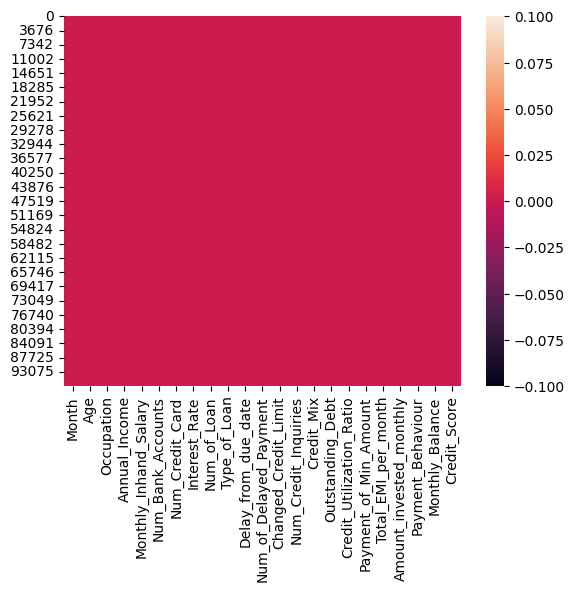

In [51]:
sns.heatmap(df.isnull())

In [52]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [53]:
df.shape

(84945, 23)

# outliers

In [54]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

<Axes: xlabel='Monthly_Inhand_Salary'>

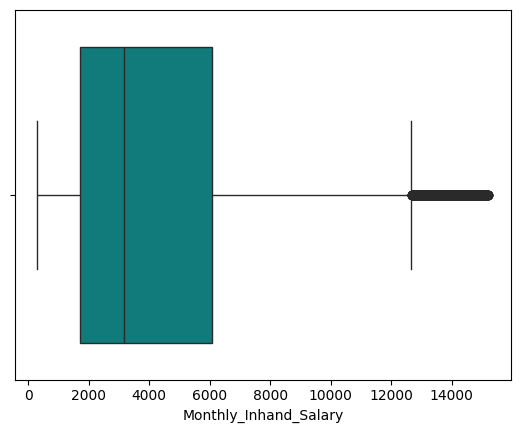

In [55]:
sns.boxplot(x=df['Monthly_Inhand_Salary'],color='darkcyan')

In [56]:
print('outliers',df[(df['Monthly_Inhand_Salary']>14000)].count())

outliers Month                       595
Age                         595
Occupation                  595
Annual_Income               595
Monthly_Inhand_Salary       595
Num_Bank_Accounts           595
Num_Credit_Card             595
Interest_Rate               595
Num_of_Loan                 595
Type_of_Loan                595
Delay_from_due_date         595
Num_of_Delayed_Payment      595
Changed_Credit_Limit        595
Num_Credit_Inquiries        595
Credit_Mix                  595
Outstanding_Debt            595
Credit_Utilization_Ratio    595
Payment_of_Min_Amount       595
Total_EMI_per_month         595
Amount_invested_monthly     595
Payment_Behaviour           595
Monthly_Balance             595
Credit_Score                595
dtype: int64


In [57]:
df = df[(df['Monthly_Inhand_Salary'] < 14000)]
df.shape

(84350, 23)

<Axes: xlabel='Num_Bank_Accounts'>

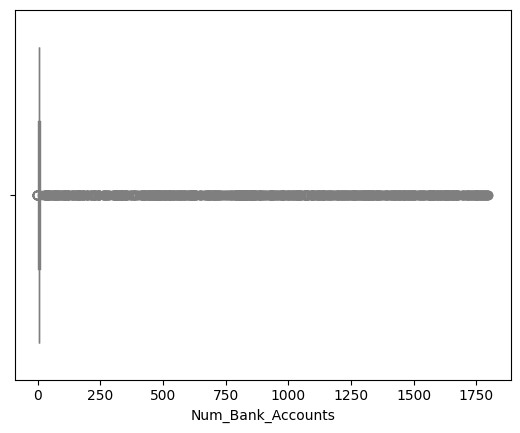

In [58]:
sns.boxplot(x=df['Num_Bank_Accounts'],color='lightgray')

In [59]:
print('outliers',df[(df['Num_Bank_Accounts']>1550)].count())

outliers Month                       155
Age                         155
Occupation                  155
Annual_Income               155
Monthly_Inhand_Salary       155
Num_Bank_Accounts           155
Num_Credit_Card             155
Interest_Rate               155
Num_of_Loan                 155
Type_of_Loan                155
Delay_from_due_date         155
Num_of_Delayed_Payment      155
Changed_Credit_Limit        155
Num_Credit_Inquiries        155
Credit_Mix                  155
Outstanding_Debt            155
Credit_Utilization_Ratio    155
Payment_of_Min_Amount       155
Total_EMI_per_month         155
Amount_invested_monthly     155
Payment_Behaviour           155
Monthly_Balance             155
Credit_Score                155
dtype: int64


In [60]:
df = df[(df['Num_Bank_Accounts'] < 1550)]
df.shape

(84195, 23)

<Axes: xlabel='Num_Credit_Card'>

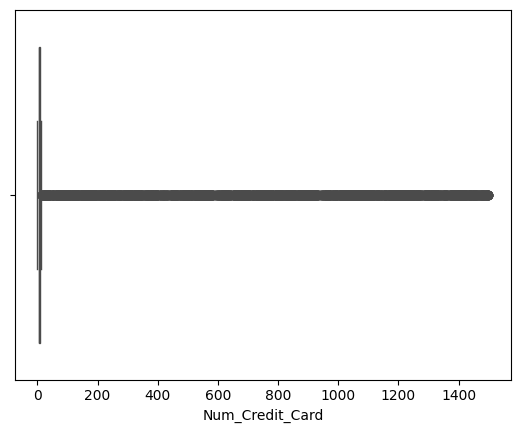

In [61]:
sns.boxplot(x=df['Num_Credit_Card'],color='goldenrod')

In [62]:
print('outliers',df[(df['Num_Credit_Card']>1350)].count())

outliers Month                       192
Age                         192
Occupation                  192
Annual_Income               192
Monthly_Inhand_Salary       192
Num_Bank_Accounts           192
Num_Credit_Card             192
Interest_Rate               192
Num_of_Loan                 192
Type_of_Loan                192
Delay_from_due_date         192
Num_of_Delayed_Payment      192
Changed_Credit_Limit        192
Num_Credit_Inquiries        192
Credit_Mix                  192
Outstanding_Debt            192
Credit_Utilization_Ratio    192
Payment_of_Min_Amount       192
Total_EMI_per_month         192
Amount_invested_monthly     192
Payment_Behaviour           192
Monthly_Balance             192
Credit_Score                192
dtype: int64


In [63]:
df = df[(df['Num_Credit_Card'] < 1350)]
df.shape

(84003, 23)

<Axes: xlabel='Interest_Rate'>

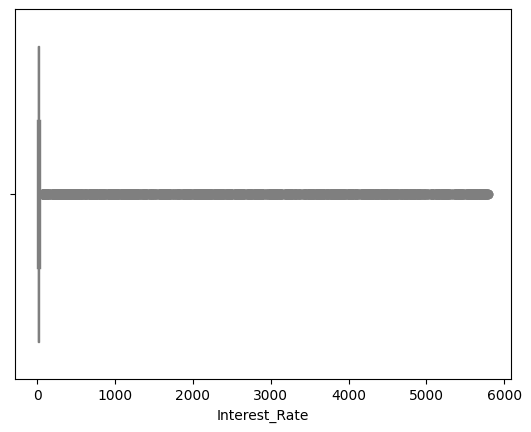

In [64]:
sns.boxplot(x=df['Interest_Rate'],color='wheat')

In [65]:
print('outliers',df[(df['Interest_Rate']>5150)].count())

outliers Month                       188
Age                         188
Occupation                  188
Annual_Income               188
Monthly_Inhand_Salary       188
Num_Bank_Accounts           188
Num_Credit_Card             188
Interest_Rate               188
Num_of_Loan                 188
Type_of_Loan                188
Delay_from_due_date         188
Num_of_Delayed_Payment      188
Changed_Credit_Limit        188
Num_Credit_Inquiries        188
Credit_Mix                  188
Outstanding_Debt            188
Credit_Utilization_Ratio    188
Payment_of_Min_Amount       188
Total_EMI_per_month         188
Amount_invested_monthly     188
Payment_Behaviour           188
Monthly_Balance             188
Credit_Score                188
dtype: int64


In [66]:
df = df[(df['Interest_Rate'] < 5150)]
df.shape

(83815, 23)

<Axes: xlabel='Changed_Credit_Limit'>

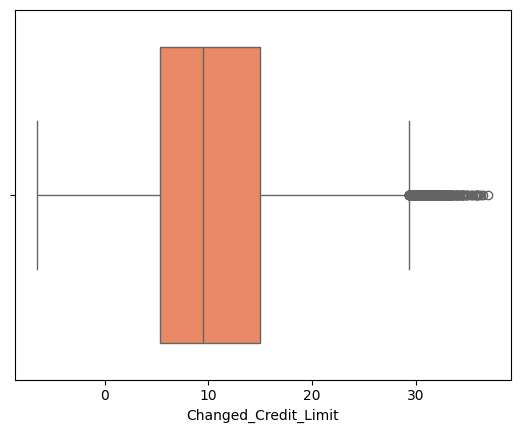

In [67]:
sns.boxplot(x=df['Changed_Credit_Limit'],color='coral')

In [68]:
print('outliers',df[(df['Changed_Credit_Limit']>30)].count())

outliers Month                       225
Age                         225
Occupation                  225
Annual_Income               225
Monthly_Inhand_Salary       225
Num_Bank_Accounts           225
Num_Credit_Card             225
Interest_Rate               225
Num_of_Loan                 225
Type_of_Loan                225
Delay_from_due_date         225
Num_of_Delayed_Payment      225
Changed_Credit_Limit        225
Num_Credit_Inquiries        225
Credit_Mix                  225
Outstanding_Debt            225
Credit_Utilization_Ratio    225
Payment_of_Min_Amount       225
Total_EMI_per_month         225
Amount_invested_monthly     225
Payment_Behaviour           225
Monthly_Balance             225
Credit_Score                225
dtype: int64


In [69]:
df = df[(df['Changed_Credit_Limit'] < 30)]
df.shape

(83590, 23)

<Axes: xlabel='Delay_from_due_date'>

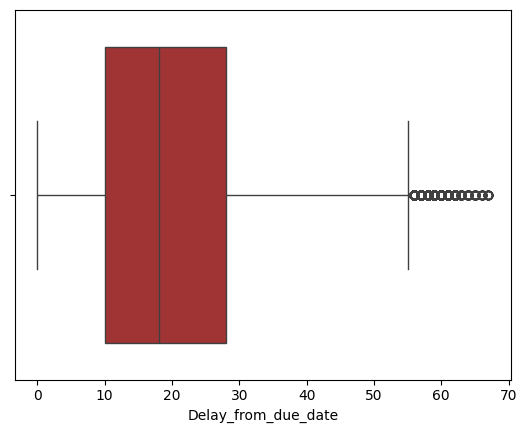

In [70]:
sns.boxplot(x=df['Delay_from_due_date'],color='firebrick')

In [71]:
print('outliers',df[(df['Delay_from_due_date']>63)].count())

outliers Month                       153
Age                         153
Occupation                  153
Annual_Income               153
Monthly_Inhand_Salary       153
Num_Bank_Accounts           153
Num_Credit_Card             153
Interest_Rate               153
Num_of_Loan                 153
Type_of_Loan                153
Delay_from_due_date         153
Num_of_Delayed_Payment      153
Changed_Credit_Limit        153
Num_Credit_Inquiries        153
Credit_Mix                  153
Outstanding_Debt            153
Credit_Utilization_Ratio    153
Payment_of_Min_Amount       153
Total_EMI_per_month         153
Amount_invested_monthly     153
Payment_Behaviour           153
Monthly_Balance             153
Credit_Score                153
dtype: int64


In [72]:
df = df[(df['Delay_from_due_date'] < 63)]
df.shape

(83381, 23)

<Axes: xlabel='Outstanding_Debt'>

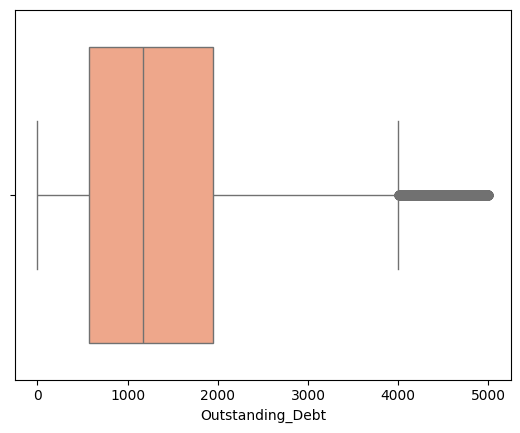

In [73]:
sns.boxplot(x=df['Outstanding_Debt'],color='lightsalmon')

In [74]:
print('outliers',df[(df['Outstanding_Debt']>4960)].count())

outliers Month                       233
Age                         233
Occupation                  233
Annual_Income               233
Monthly_Inhand_Salary       233
Num_Bank_Accounts           233
Num_Credit_Card             233
Interest_Rate               233
Num_of_Loan                 233
Type_of_Loan                233
Delay_from_due_date         233
Num_of_Delayed_Payment      233
Changed_Credit_Limit        233
Num_Credit_Inquiries        233
Credit_Mix                  233
Outstanding_Debt            233
Credit_Utilization_Ratio    233
Payment_of_Min_Amount       233
Total_EMI_per_month         233
Amount_invested_monthly     233
Payment_Behaviour           233
Monthly_Balance             233
Credit_Score                233
dtype: int64


In [75]:
df = df[(df['Outstanding_Debt'] < 4960)]
df.shape

(83148, 23)

<Axes: xlabel='Monthly_Balance'>

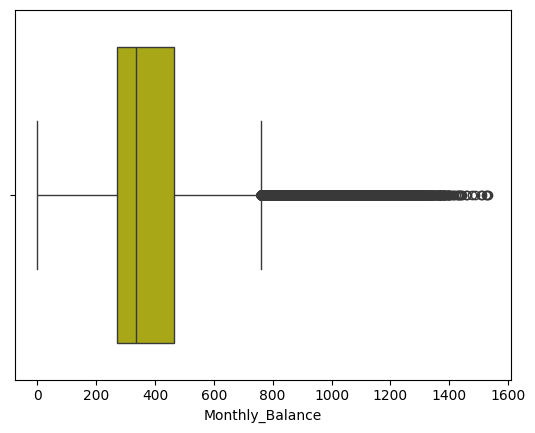

In [76]:
sns.boxplot(x=df['Monthly_Balance'],color='y')

In [77]:
print('outliers',df[(df['Monthly_Balance']>1250)].count())

outliers Month                       224
Age                         224
Occupation                  224
Annual_Income               224
Monthly_Inhand_Salary       224
Num_Bank_Accounts           224
Num_Credit_Card             224
Interest_Rate               224
Num_of_Loan                 224
Type_of_Loan                224
Delay_from_due_date         224
Num_of_Delayed_Payment      224
Changed_Credit_Limit        224
Num_Credit_Inquiries        224
Credit_Mix                  224
Outstanding_Debt            224
Credit_Utilization_Ratio    224
Payment_of_Min_Amount       224
Total_EMI_per_month         224
Amount_invested_monthly     224
Payment_Behaviour           224
Monthly_Balance             224
Credit_Score                224
dtype: int64


In [78]:
df = df[(df['Monthly_Balance'] < 1250)]
df.shape

(82924, 23)

<Axes: xlabel='Amount_invested_monthly'>

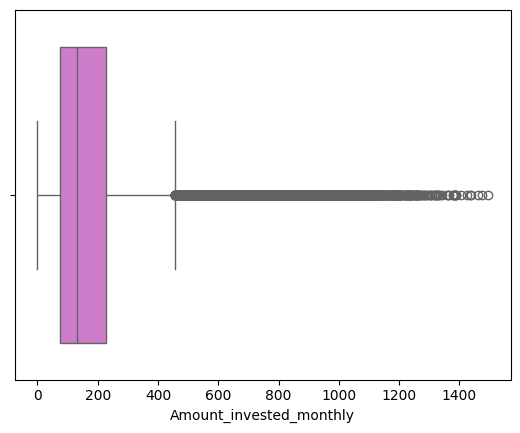

In [79]:
sns.boxplot(x=df['Amount_invested_monthly'],color='orchid')

In [80]:
print('outliers',df[(df['Amount_invested_monthly']>1100)].count())

outliers Month                       194
Age                         194
Occupation                  194
Annual_Income               194
Monthly_Inhand_Salary       194
Num_Bank_Accounts           194
Num_Credit_Card             194
Interest_Rate               194
Num_of_Loan                 194
Type_of_Loan                194
Delay_from_due_date         194
Num_of_Delayed_Payment      194
Changed_Credit_Limit        194
Num_Credit_Inquiries        194
Credit_Mix                  194
Outstanding_Debt            194
Credit_Utilization_Ratio    194
Payment_of_Min_Amount       194
Total_EMI_per_month         194
Amount_invested_monthly     194
Payment_Behaviour           194
Monthly_Balance             194
Credit_Score                194
dtype: int64


In [81]:
df = df[(df['Amount_invested_monthly'] < 1100)]
df.shape

(82730, 23)

# EDA

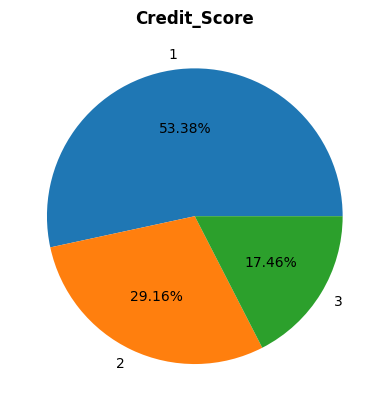

In [82]:
credit = df['Credit_Score'].value_counts()
plt.title("Credit_Score", fontsize = 12, weight='bold')
plt.pie(credit,labels=credit.index,radius=1, autopct='%.2f%%')
plt.show()
# we notice that we have imbalanced data in the target

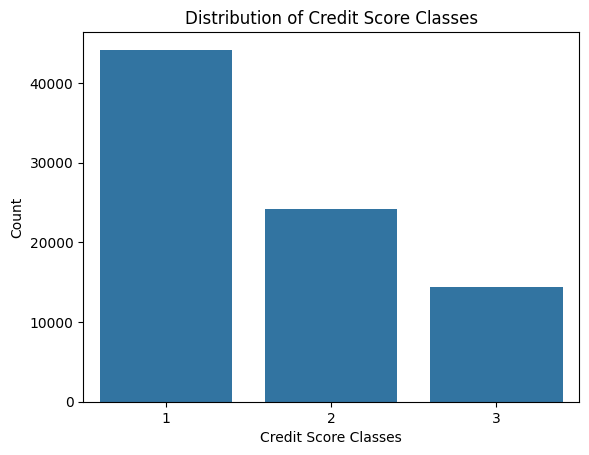

In [83]:
sns.countplot(x='Credit_Score', data=df)
plt.title('Distribution of Credit Score Classes')
plt.xlabel('Credit Score Classes')
plt.ylabel('Count')
plt.show()

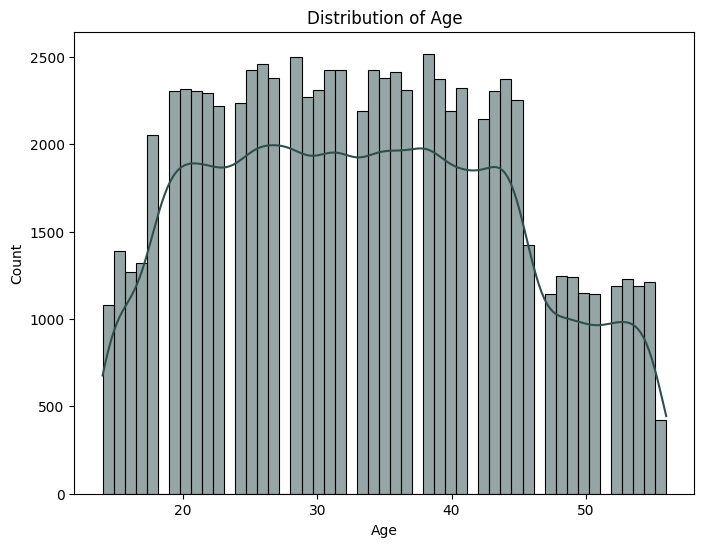

In [84]:
column_name = 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=column_name, kde=True,color='darkslategray')
plt.title(f"Distribution of {column_name}")
plt.show()

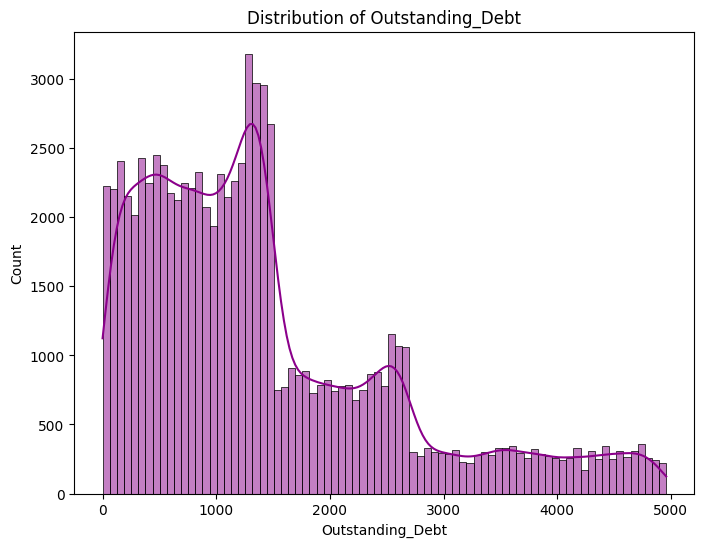

In [85]:
column_name = 'Outstanding_Debt'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=column_name, kde=True,color='darkmagenta')
plt.title(f"Distribution of {column_name}")
plt.show()

In [86]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

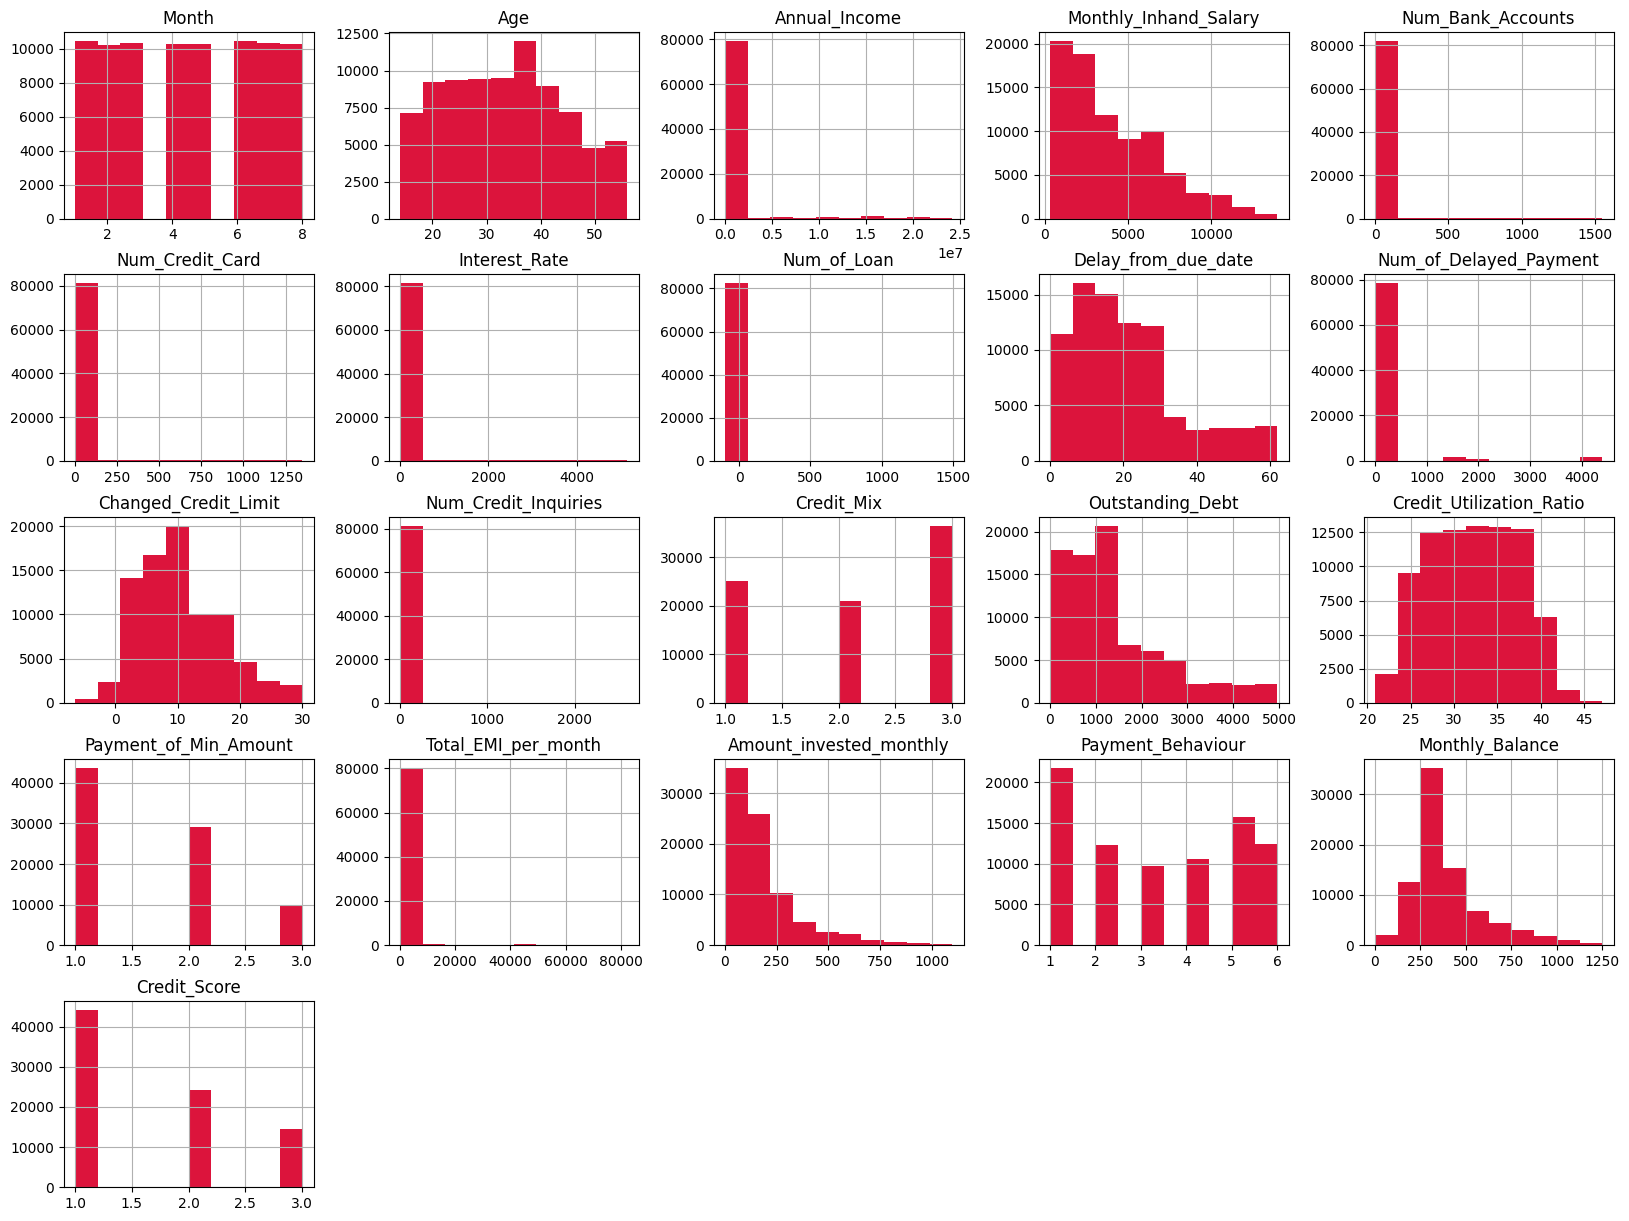

In [87]:
df.hist(figsize=(20, 15),color='crimson')
plt.show()

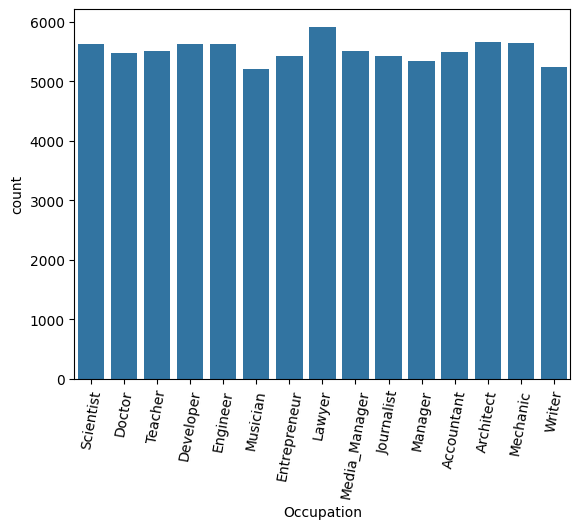

In [88]:
sns.countplot(x=df["Occupation"])
plt.xticks(rotation=80)
plt.show()

# encoding

In [89]:
df.dtypes

Month                         int64
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [90]:
from sklearn.preprocessing import LabelEncoder
columns_to_convert=['Occupation','Type_of_Loan']
label_encoder=LabelEncoder()
for col in columns_to_convert:
    if df[col].dtypes=='object':
        df[col]=label_encoder.fit_transform(df[col])

# scaling

In [91]:
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3,4,3,4.0,127,3,7.0,11.27,4.0,2.0,809.98,26.822620,2,49.574949,80.415295,4.0,312.494089,3
1,2,23.0,12,19114.12,1087.546445,3,4,3,4.0,127,1,4134.0,11.27,4.0,1.0,809.98,31.944960,2,49.574949,118.280222,3.0,284.629162,3
3,4,23.0,12,19114.12,5640.117744,3,4,3,4.0,127,5,4.0,6.27,4.0,1.0,809.98,31.377862,2,49.574949,199.458074,1.0,223.451310,3
4,5,23.0,12,19114.12,1824.843333,3,4,3,4.0,127,6,2047.0,11.27,4.0,1.0,809.98,24.797347,2,49.574949,41.420153,5.0,341.489231,3
5,6,23.0,12,19114.12,7727.560450,3,4,3,4.0,127,8,4.0,9.27,4.0,1.0,809.98,27.262259,2,49.574949,62.430172,3.0,340.479212,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,4,49.0,14,37188.10,3097.008333,1,4,5,3.0,2461,3,12.0,5.38,3.0,1.0,620.64,36.979007,3,84.205949,215.486386,1.0,300.008498,3
99981,6,50.0,14,21725043.00,3097.008333,1,4,5,3.0,2461,5,12.0,5.38,3.0,1.0,620.64,37.753013,3,84.205949,147.339908,1.0,368.154976,3
99986,3,28.0,1,20002.88,1929.906667,10,8,29,5.0,4877,33,25.0,18.31,9.0,2.0,3571.70,24.713861,1,60.964772,76.282793,1.0,345.743101,2
99990,7,28.0,1,20002.88,1929.906667,10,8,29,5.0,4877,33,26.0,18.31,9.0,2.0,3571.70,25.123535,1,60.964772,173.275503,3.0,228.750392,1


In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler=StandardScaler()

In [94]:
columns_to_scale = [col for col in df.columns if col != 'Credit_Score']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [95]:
cor = df.corr()
cor_target = abs(cor["Credit_Score"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("Credit_Score" , ascending=False)*100

,Credit_Score
Credit_Score,100.000000
Credit_Mix,36.484887
Changed_Credit_Limit,18.765464
Payment_of_Min_Amount,17.765323
Delay_from_due_date,9.158514
Age,5.370565
Amount_invested_monthly,5.217050
Monthly_Inhand_Salary,5.151737
Monthly_Balance,4.776978
Month,3.857246


# solving imbalanced data

In [96]:
df['Credit_Score'].value_counts()

1    44165
2    24123
3    14442
Name: Credit_Score, dtype: int64

In [97]:
from sklearn.utils import resample

In [98]:
df_majority = df[df['Credit_Score'] == 1]
df_minority1 = df[df['Credit_Score'] == 2]
df_minority2 = df[df['Credit_Score'] == 3]
df_minority_upsampled1 = resample(df_minority1,
                                 replace=True,
                                 n_samples=45173,
                                 random_state=42)

df_minority_upsampled2 = resample(df_minority2,
                                 replace=True,
                                 n_samples=45173,
                                 random_state=42)

df = pd.concat([df_minority_upsampled1, df_minority_upsampled2, df_majority])

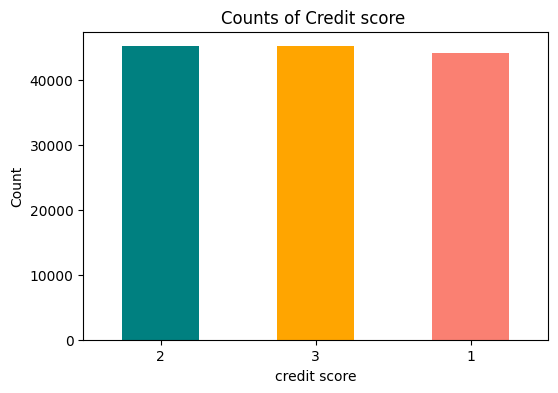

In [99]:
plt.figure(figsize=(6, 4))
df['Credit_Score'].value_counts().plot(kind='bar', color=['teal', 'orange','salmon'])
plt.title('Counts of Credit score ')
plt.xlabel('credit score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# modeling

In [100]:
cor = df.corr()
cor_target = abs(cor["Credit_Score"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("Credit_Score" , ascending=False)*100

,Credit_Score
Credit_Score,100.000000
Credit_Mix,42.838496
Payment_of_Min_Amount,27.633633
Changed_Credit_Limit,25.010867
Delay_from_due_date,23.989052
Outstanding_Debt,17.735423
Monthly_Balance,11.741566
Monthly_Inhand_Salary,11.186340
Age,10.378765
Amount_invested_monthly,9.619065


In [101]:
df=df[['Credit_Score','Credit_Mix','Payment_of_Min_Amount','Changed_Credit_Limit',
   'Delay_from_due_date','Outstanding_Debt','Monthly_Inhand_Salary',
   'Monthly_Balance','Amount_invested_monthly','Age','Payment_Behaviour',
   'Month','Credit_Utilization_Ratio']]

In [102]:
x=df.drop('Credit_Score',axis=1).values
y=df['Credit_Score'].values

In [103]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state=42)

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf=RandomForestClassifier(n_estimators=3,max_depth=6,max_features=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_features=4, n_estimators=3)

In [106]:
rf.score(x_train,y_train)

0.693655026119366

In [107]:
rf.score(x_test,y_test)

0.6922207684072796

In [108]:
y_pred=rf.predict(x_test)
y_pred

array([3, 2, 3, ..., 3, 2, 2])

In [109]:
pred = pd.DataFrame({"y_test": y_test , "y_pred": y_pred})
pred

,y_test,y_pred
0,2,3
1,2,2
2,3,3
3,3,3
4,3,3
...,...,...
33623,3,3
33624,2,2
33625,3,3
33626,1,2
